<h1><center> LHoutputs 
OFT TST



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/!lab/Manuscripts/LHoutputs/rawdata/

/content/drive/MyDrive/!lab/Manuscripts/LHoutputs/rawdata


In [3]:
%run /content/drive/MyDrive/!lab/FiberPhotometryDataAnalysis.ipynb

All Fiber Photometry functions are ready to use


In [4]:
mice = ['LHA1','LHA2','LHA3','LHA4','LHA5','LHA6','LHA7','LHA8','LHA9','LHA10','LHA11','LHA12',
        'LHA13','LHA14','LHA15','LHA16','LHA17']
outputs = ['LHA-LHb', 'LHA-VTA','LHA-DRN']        
tests = ['OFT','TST']

In [5]:
filename = 'LH_oft-tst.h5'

# Save recordings to HDF file

In [8]:
folders = { 'OFT': ['/content/drive/My Drive/!lab/Data/Kate/!FP/Wrap-up of LHA/OFT/raw/'],
            'TST': ['/content/drive/My Drive/!lab/Data/Kate/!FP/Wrap-up of LHA/TST/raw/']}

#### OFT

In [9]:
test = 'OFT'
oft_full_file_names = []
for folder in folders[test]:
  files = find_files(folder,['.xlsx'])
  for f in files:
    oft_full_file_names.append(folder+f)
#oft_full_file_names

In [10]:
for file_ in oft_full_file_names:

  file_split = file_.split('/') 
  name = file_split[-1]
  folder = '/'.join(file_split[:-1])

  # Experiment info ------------------------------------------------------------
  sepname = name.split('_')      
  mouse = sepname[0]
  experiment = sepname[-1][:-5]
  outputs = ['LHA-'+sepname[1],'LHA-'+sepname[2],'LHA-'+sepname[3]]

  if experiment[-1] == 'T':
    trial = '1'
  else:
    n_trial = int(experiment[-1])
    if n_trial > 2:
      trial = str(n_trial-1)
    else:
      trial = str(n_trial)

 # Read data
  df = pd.read_excel(file_,index_col=False)
  df = df[1:]

 # Time
  realtime_fp = [str(t) for t in df['Datetime_410nm']]
  time_ = time_to_seconds(realtime_fp, realtime_fp[0])
  
 # Signals
  references = {}
  signals = {}
  for fiber,output in enumerate(outputs):
    if output in ['LHA-1','LHA-2','LHA-3']:
      pass
    else:
      references[output] = np.array(df['MeanInt_410nm_'+str(fiber*2+1)])
      signals[output] = np.array(df['MeanInt_470nm_'+str(fiber*2+1)])

  for fiber,output in enumerate(outputs):
    if output in ['LHA-1','LHA-2','LHA-3']:
      outputs.pop(fiber)


 # Behavioral events -----------------------------------------------------------

 # Anymaze file
  name_am = mouse+'_'+experiment+'_anymaze.csv'
  df_am = pd.read_csv(folder+'/'+name_am,sep=',',index_col=False)
  time_am = np.array(df_am['Time'])
  
 # Movement 
  speed = np.array(df_am['Speed'])*100 # cm/s
  mobility_score = np.array(df_am['Freezing score'])
  movement = np.interp(speed, (np.nanmin(speed),np.nanmax(speed)), (0,1))
 # Immobility onsets and offsets
  immobility = find_onoffset_immobility(movement, time_am, 1, 0.1, 0.15)

  events = {'immobility': immobility}

  measurements = {'movement': {'time': time_am,
                             'values': movement}}

  
  raw = FiberPhotometryRecording(signals,references,time_,events,measurements,mouse,'OFT',trial)
  raw.saveRecording(filename)
  print(raw.mouse, raw.test, raw.trial, raw.outputs)

LHA10 OFT 1 ['LHA-VTA', 'LHA-DRN']
LHA14 OFT 1 ['LHA-LHb', 'LHA-VTA', 'LHA-DRN']
LHA15 OFT 1 ['LHA-LHb', 'LHA-VTA', 'LHA-DRN']
LHA16 OFT 1 ['LHA-LHb', 'LHA-VTA', 'LHA-DRN']
LHA17 OFT 1 ['LHA-LHb', 'LHA-VTA', 'LHA-DRN']
LHA1 OFT 2 ['LHA-LHb', 'LHA-DRN']
LHA1 OFT 1 ['LHA-VTA', 'LHA-DRN']
LHA3 OFT 2 ['LHA-LHb', 'LHA-DRN']
LHA3 OFT 1 ['LHA-VTA', 'LHA-DRN']
LHA4 OFT 1 ['LHA-VTA', 'LHA-DRN']
LHA6 OFT 2 ['LHA-LHb', 'LHA-DRN']
LHA6 OFT 1 ['LHA-VTA', 'LHA-DRN']
LHA8 OFT 1 ['LHA-LHb', 'LHA-DRN']
LHA9 OFT 1 ['LHA-VTA', 'LHA-DRN']


#### TST

In [11]:
test = 'TST'
tst_full_file_names = []
for folder in folders[test]:
  files = find_files(folder,['.xlsx'])
  for f in files:
    tst_full_file_names.append(folder+f)
#tst_full_file_names

In [12]:
for file_ in tst_full_file_names:

  file_split = file_.split('/') 
  name = file_split[-1]
  folder = '/'.join(file_split[:-1])

  # Experiment info ------------------------------------------------------------
  sepname = name.split('_')      
  mouse = sepname[0]
  experiment = sepname[-1][:-5]
  outputs = ['LHA-'+sepname[1],'LHA-'+sepname[2],'LHA-'+sepname[3]]

  if experiment[-1] == 'T':
    trial = '1'
  else:
    n_trial = int(experiment[-1])
    if n_trial > 2:
      trial = str(n_trial-1)
    else:
      trial = str(n_trial)

 # Read data
  df = pd.read_excel(file_,index_col=False)
  df = df[1:]

 # Time
  realtime_fp = [str(t) for t in df['Datetime_410nm']]
  time_ = time_to_seconds(realtime_fp, realtime_fp[0])
  
 # Signals
  references = {}
  signals = {}
  for fiber,output in enumerate(outputs):
    if output in ['LHA-1','LHA-2','LHA-3']:
      pass
    else:
      references[output] = np.array(df['MeanInt_410nm_'+str(fiber*2+1)])
      signals[output] = np.array(df['MeanInt_470nm_'+str(fiber*2+1)])

  for fiber,output in enumerate(outputs):
    if output in ['LHA-1','LHA-2','LHA-3']:
      outputs.pop(fiber)

 # Behavioral events -----------------------------------------------------------

 # Anymaze file
  name_am = mouse+'_'+experiment+'_anymaze.csv'
  df_am = pd.read_csv(folder+'/'+name_am,sep=',',index_col=False)
  time_am = np.array(df_am['Time'])
  
 # Movement 
  speed = np.array(df_am['Speed'])*100 # cm/s
  mobility_score = np.array(df_am['Freezing score'])
  movement = np.interp(speed, (np.nanmin(speed),np.nanmax(speed)), (0,1))
 # Immobility onsets and offsets
  immobility = find_onoffset_immobility(movement, time_am, 1, 0.15, 0.2)

  events = {'immobility': immobility}

  measurements = {'movement': {'time': time_am,
                             'values': movement}}

  
  raw = FiberPhotometryRecording(signals,references,time_,events,measurements,mouse,'TST',trial)
  raw.saveRecording(filename)
  print(raw.mouse, raw.test, raw.trial, raw.outputs)

LHA14 TST 1 ['LHA-LHb', 'LHA-VTA', 'LHA-DRN']
LHA15 TST 1 ['LHA-LHb', 'LHA-VTA', 'LHA-DRN']
LHA16 TST 1 ['LHA-LHb', 'LHA-VTA', 'LHA-DRN']
LHA17 TST 1 ['LHA-LHb', 'LHA-VTA', 'LHA-DRN']
LHA1 TST 2 ['LHA-LHb', 'LHA-DRN']
LHA1 TST 1 ['LHA-VTA', 'LHA-DRN']
LHA3 TST 2 ['LHA-LHb', 'LHA-DRN']
LHA3 TST 1 ['LHA-VTA', 'LHA-DRN']
LHA6 TST 1 ['LHA-VTA', 'LHA-DRN']
LHA8 TST 1 ['LHA-LHb', 'LHA-DRN']
LHA9 TST 1 ['LHA-VTA', 'LHA-DRN']


# Processing data

In [7]:
info_for_array = {'immobility': {'duration': 2.0,
                                'interaval': 2.0}}

In [13]:
for test in tests:
  for mouse in mice:
    for trial in ['1','2']:

      r = FiberPhotometryRecording()
      r.loadRecording(filename,mouse,test,trial)
      if r.rawSignals is not None:
        if r.measurements is not None:
          r.smoothMeasurements(smooth_filter='moving average',smooth_parameter=1)
          r.interpolateMeasurements(period=0.1)
        r.getDFF(airpls_lambda=5e3,smooth_parameter=1,interpolate=True,period=0.1)#,plot=True,save=True)
        r.getPerievents(info_for_array)#,plot=True,save=True)
        r.saveRecording(filename) 
      del r

The recording for mouse LHA1 in the experiment OFT-1 is successfully loaded.
The recording for mouse LHA1 in the experiment OFT-2 is successfully loaded.
The recording for mouse LHA3 in the experiment OFT-1 is successfully loaded.
The recording for mouse LHA3 in the experiment OFT-2 is successfully loaded.
The recording for mouse LHA4 in the experiment OFT-1 is successfully loaded.
The recording for mouse LHA6 in the experiment OFT-1 is successfully loaded.
The recording for mouse LHA6 in the experiment OFT-2 is successfully loaded.
The recording for mouse LHA8 in the experiment OFT-1 is successfully loaded.
The recording for mouse LHA9 in the experiment OFT-1 is successfully loaded.
The recording for mouse LHA10 in the experiment OFT-1 is successfully loaded.
The recording for mouse LHA14 in the experiment OFT-1 is successfully loaded.
The recording for mouse LHA15 in the experiment OFT-1 is successfully loaded.
The recording for mouse LHA16 in the experiment OFT-1 is successfully loa

# Example traces

In [16]:
r = FiberPhotometryRecording()
r.loadRecording(filename,'LHA15','OFT','1')
r.getDFF(airpls_lambda=5e3,smooth_parameter=0.5)

The recording for mouse LHA15 in the experiment OFT-1 is successfully loaded.


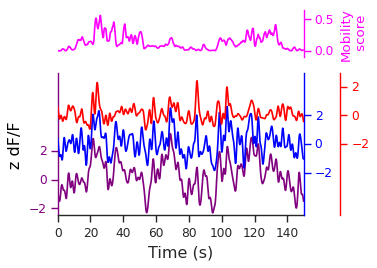

In [18]:
r.plotExample(['LHA-DRN','LHA-VTA','LHA-LHb'],measure='movement',
              t0=445,t1=595,
              ylim=[-2.5,7.5],ylim1=[-5,5],ylim2=[-7,3],
              yticks=[-2,0,2],yticks1=[-2,0,2],yticks2=[-2,0,2],
              ylim_m=[-0.1,0.65],yticks_m=[0,0.5],
              figsize=(5,3.5))
plt.show()

In [20]:
r = FiberPhotometryRecording()
r.loadRecording(filename,'LHA16','TST','1')
r.getDFF(airpls_lambda=5e3,smooth_parameter=0.5)

The recording for mouse LHA16 in the experiment TST-1 is successfully loaded.


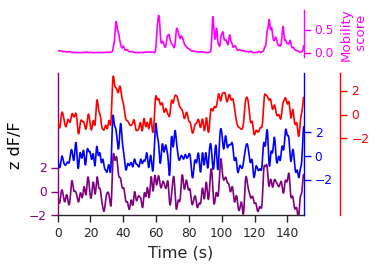

In [21]:
r.plotExample(['LHA-DRN','LHA-VTA','LHA-LHb'],measure='movement',
              t0=319,t1=469,
              ylim=[-2,10],ylim1=[-5,7],ylim2=[-8.5,3.5],
              yticks=[-2,0,2],yticks1=[-2,0,2],yticks2=[-2,0,2],
              ylim_m=[-0.1,0.95],yticks_m=[0,0.5],
              figsize=(5,3.5))
plt.show()

# Summary plots

#### Set attributes to the HDF file

In [22]:
with h5py.File(filename,'a') as f:
  f.attrs['mice'] = mice
  f.attrs['outputs'] = outputs
  f.attrs['tests'] = tests

In [23]:
with h5py.File(filename, 'a') as f:
  f.attrs['good recordings'] = [['LHA1','OFT','2','LHA-LHb'],
                                ['LHA1','OFT','1','LHA-VTA'],
                                ['LHA1','OFT','1','LHA-DRN'],
                                ['LHA1','OFT','2','LHA-DRN'],
                                ['LHA3','OFT','2','LHA-DRN'],
                                ['LHA4','OFT','1','LHA-DRN'],
                                ['LHA6','OFT','2','LHA-LHb'],
                                ['LHA6','OFT','1','LHA-VTA'],
                                ['LHA6','OFT','1','LHA-DRN'],
                                ['LHA8','OFT','1','LHA-LHb'],
                                ['LHA8','OFT','1','LHA-DRN'],
                                ['LHA9','OFT','1','LHA-VTA'],
                                ['LHA9','OFT','1','LHA-DRN'],
                                ['LHA10','OFT','1','LHA-DRN'],
                                ['LHA14','OFT','1','LHA-VTA'],
                                ['LHA14','OFT','1','LHA-DRN'],
                                ['LHA15','OFT','1','LHA-LHb'],
                                ['LHA15','OFT','1','LHA-VTA'],
                                ['LHA15','OFT','1','LHA-DRN'],
                                ['LHA16','OFT','1','LHA-LHb'],
                                ['LHA16','OFT','1','LHA-VTA'],
                                ['LHA16','OFT','1','LHA-DRN'],
                                ['LHA17','OFT','1','LHA-VTA'],
                                ['LHA17','OFT','1','LHA-DRN'],
                                ['LHA1','TST','2','LHA-LHb'],
                                ['LHA1','TST','1','LHA-VTA'],
                                ['LHA1','TST','1','LHA-DRN'],
                                ['LHA1','TST','1','LHA-DRN'],
                                ['LHA3','TST','2','LHA-LHb'],
                                ['LHA3','TST','2','LHA-DRN'],
                                ['LHA6','TST','1','LHA-VTA'],
                                ['LHA6','TST','1','LHA-DRN'],
                                ['LHA8','TST','1','LHA-LHb'],
                                ['LHA8','TST','1','LHA-DRN'],
                                ['LHA9','TST','1','LHA-VTA'],
                                ['LHA9','TST','1','LHA-DRN'],
                                ['LHA14','TST','1','LHA-LHb'],
                                ['LHA14','TST','1','LHA-VTA'],
                                ['LHA14','TST','1','LHA-DRN'],
                                ['LHA15','TST','1','LHA-LHb'],
                                ['LHA15','TST','1','LHA-VTA'],
                                ['LHA15','TST','1','LHA-DRN'],
                                ['LHA16','TST','1','LHA-LHb'],
                                ['LHA16','TST','1','LHA-VTA'],
                                ['LHA16','TST','1','LHA-DRN']]

#### OFT

In [24]:
oft = FiberPhotometryTest(filename,'OFT')

Experiment information for test OFT is successfully loaded.


In [25]:
oft.getMeans(auc_frames = {'immobility-onset': [[-3,-1],[1,3]],
                          'immobility-offset': [[-3,-1],[-1,0],[0,1],[1,3]]})

LHA1,1 LHA1,2 LHA10,1 LHA14,1 LHA15,1 LHA16,1 LHA17,1 LHA3,2 LHA4,1 LHA6,1 LHA8,1 LHA9,1 .
Saved dF/F mean traces for LHA-DRN immobility-offset
LHA1,1 LHA1,2 LHA10,1 LHA14,1 LHA15,1 LHA16,1 LHA17,1 LHA3,2 LHA4,1 LHA6,1 LHA8,1 LHA9,1 .
Saved dF/F mean traces for LHA-DRN immobility-onset
LHA1,2 LHA15,1 LHA16,1 LHA6,2 LHA8,1 .
Saved dF/F mean traces for LHA-LHb immobility-offset
LHA1,2 LHA15,1 LHA16,1 LHA6,2 LHA8,1 .
Saved dF/F mean traces for LHA-LHb immobility-onset
LHA1,1 LHA14,1 LHA15,1 LHA16,1 LHA17,1 LHA6,1 LHA9,1 .
Saved dF/F mean traces for LHA-VTA immobility-offset
LHA1,1 LHA14,1 LHA15,1 LHA16,1 LHA17,1 LHA6,1 LHA9,1 .
Saved dF/F mean traces for LHA-VTA immobility-onset
LHA1,1 LHA1,2 LHA10,1 LHA14,1 LHA15,1 LHA16,1 LHA17,1 LHA3,1 LHA3,2 LHA4,1 LHA6,1 LHA6,2 LHA8,1 LHA9,1 .
Saved dF/F mean traces for movement immobility-offset.
LHA1,1 LHA1,2 LHA10,1 LHA14,1 LHA15,1 LHA16,1 LHA17,1 LHA3,1 LHA3,2 LHA4,1 LHA6,1 LHA6,2 LHA8,1 LHA9,1 .
Saved dF/F mean traces for movement immobility-ons

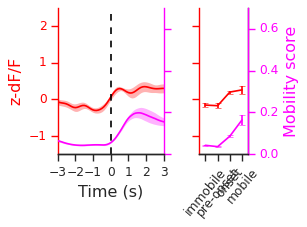

In [26]:
oft.plotMeans('LHA-LHb','immobility','offset',measure='movement',
              plot_type='mean and SEM',
              color='red',periods=['immobile','pre-onset','onset','mobile'],
              ylim=[-1.5,2.5],yticks=[-1,0,1,2],xlim=[-3,3],
              ylim1=[0,0.7],yticks1=[0,0.2,0.4,0.6],
              subplot_ratio=[5,2.3],figsize=(4,3))
plt.show()

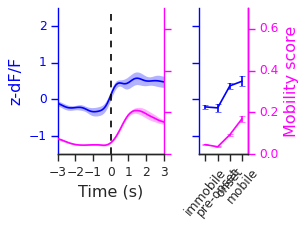

In [27]:
oft.plotMeans('LHA-VTA','immobility','offset',measure='movement',
              plot_type='mean and SEM',
              color='blue',periods=['immobile','pre-onset','onset','mobile'],
              ylim=[-1.5,2.5],yticks=[-1,0,1,2],xlim=[-3,3],
              ylim1=[0,0.7],yticks1=[0,0.2,0.4,0.6],
              subplot_ratio=[5,2.3],figsize=(4,3))
plt.show()

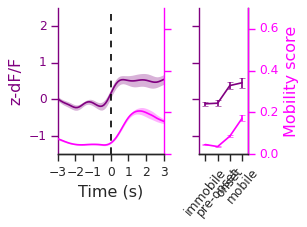

In [28]:
oft.plotMeans('LHA-DRN','immobility','offset',measure='movement',
              plot_type='mean and SEM',
              color='purple',periods=['immobile','pre-onset','onset','mobile'],
              ylim=[-1.5,2.5],yticks=[-1,0,1,2],xlim=[-3,3],
              ylim1=[0,0.7],yticks1=[0,0.2,0.4,0.6],
              subplot_ratio=[5,2.3],figsize=(4,3))
plt.show()

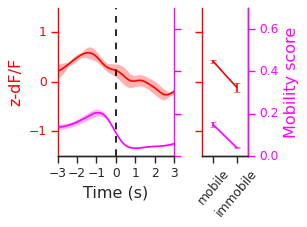

In [54]:
oft.plotMeans('LHA-LHb','immobility','onset',measure='movement',
              plot_type='mean and SEM',
              color='red',periods=['mobile','immobile'],
              ylim=[-1.5,1.5],yticks=[-1,0,1],xlim=[-3,3],
              ylim1=[0,0.7],yticks1=[0,0.2,0.4,0.6],
              figsize=(4,3),save=True,imgname='plots/LH-LHb_OFToffset.pdf')
plt.show()

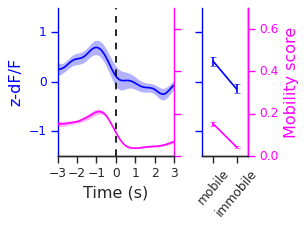

In [55]:
oft.plotMeans('LHA-VTA','immobility','onset',measure='movement',
              plot_type='mean and SEM',
              color='blue',periods=['mobile','immobile'],
              ylim=[-1.5,1.5],yticks=[-1,0,1],xlim=[-3,3],
              ylim1=[0,0.7],yticks1=[0,0.2,0.4,0.6],
              figsize=(4,3),save=True,imgname='plots/LH-VTA_OFToffset.pdf')
plt.show()

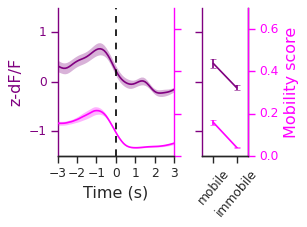

In [56]:
oft.plotMeans('LHA-DRN','immobility','onset',measure='movement',
              plot_type='mean and SEM',
              color='purple',periods=['mobile','immobile'],
              ylim=[-1.5,1.5],yticks=[-1,0,1],xlim=[-3,3],
              ylim1=[0,0.7],yticks1=[0,0.2,0.4,0.6],
              figsize=(4,3),save=True,imgname='plots/LH-DRN_OFToffset.pdf')
plt.show()

#### TST


In [34]:
tst = FiberPhotometryTest(filename,'TST')

Experiment information for test TST is successfully loaded.


In [35]:
tst.getMeans(auc_frames={'immobility-onset': [[-3,-1],[1,3]],
                        'immobility-offset': [[-3,-1],[-1,0],[0,1],[1,3]]})

LHA1,1 LHA14,1 LHA15,1 LHA16,1 LHA3,2 LHA6,1 LHA8,1 LHA9,1 .
Saved dF/F mean traces for LHA-DRN immobility-offset
LHA1,1 LHA14,1 LHA15,1 LHA16,1 LHA3,2 LHA6,1 LHA8,1 LHA9,1 .
Saved dF/F mean traces for LHA-DRN immobility-onset
LHA1,2 LHA14,1 LHA15,1 LHA16,1 LHA3,2 LHA8,1 .
Saved dF/F mean traces for LHA-LHb immobility-offset
LHA1,2 LHA14,1 LHA15,1 LHA16,1 LHA3,2 LHA8,1 .
Saved dF/F mean traces for LHA-LHb immobility-onset
LHA1,1 LHA14,1 LHA15,1 LHA16,1 LHA6,1 LHA9,1 .
Saved dF/F mean traces for LHA-VTA immobility-offset
LHA1,1 LHA14,1 LHA15,1 LHA16,1 LHA6,1 LHA9,1 .
Saved dF/F mean traces for LHA-VTA immobility-onset
LHA1,1 LHA1,2 LHA14,1 LHA15,1 LHA16,1 LHA17,1 LHA3,1 LHA3,2 LHA6,1 LHA8,1 LHA9,1 .
Saved dF/F mean traces for movement immobility-offset.
LHA1,1 LHA1,2 LHA14,1 LHA15,1 LHA16,1 LHA17,1 LHA3,1 LHA3,2 LHA6,1 LHA8,1 LHA9,1 .
Saved dF/F mean traces for movement immobility-onset.


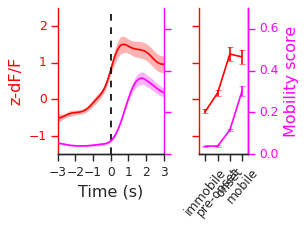

In [36]:
tst.plotMeans('LHA-LHb','immobility','offset',measure='movement',
              plot_type='mean and SEM',
              color='red',periods=['immobile','pre-onset','onset','mobile'],
              ylim=[-1.5,2.5],yticks=[-1,0,1,2],xlim=[-3,3],
              ylim1=[0,0.7],yticks1=[0,0.2,0.4,0.6],
              subplot_ratio=[5,2.3],figsize=(4,3))
plt.show()

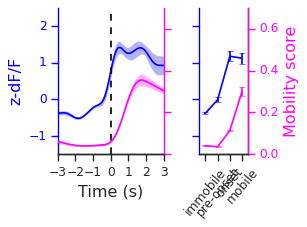

In [37]:
tst.plotMeans('LHA-VTA','immobility','offset',measure='movement',
              plot_type='mean and SEM',
              color='blue',periods=['immobile','pre-onset','onset','mobile'],
              ylim=[-1.5,2.5],yticks=[-1,0,1,2],xlim=[-3,3],
              ylim1=[0,0.7],yticks1=[0,0.2,0.4,0.6],
              subplot_ratio=[5,2.3],figsize=(4,3))
plt.show()

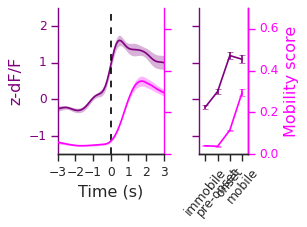

In [38]:
tst.plotMeans('LHA-DRN','immobility','offset',measure='movement',
              plot_type='mean and SEM',
              color='purple',periods=['immobile','pre-onset','onset','mobile'],
              ylim=[-1.5,2.5],yticks=[-1,0,1,2],xlim=[-3,3],
              ylim1=[0,0.7],yticks1=[0,0.2,0.4,0.6],
              subplot_ratio=[5,2.3],figsize=(4,3))
plt.show()

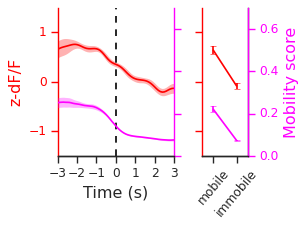

In [60]:
tst.plotMeans('LHA-LHb','immobility','onset',measure='movement',
              plot_type='mean and SEM',
              color='red',periods=['mobile','immobile'],
              ylim=[-1.5,1.5],yticks=[-1,0,1],xlim=[-3,3],
              ylim1=[0,0.7],yticks1=[0,0.2,0.4,0.6],
              figsize=(4,3),save=True,imgname='plots/LH-LHb_TSToffset.pdf')
plt.show()

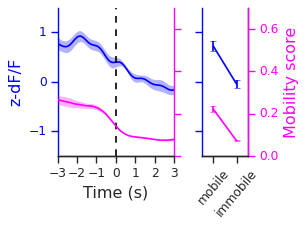

In [61]:
tst.plotMeans('LHA-VTA','immobility','onset',measure='movement',
              plot_type='mean and SEM',
              color='blue',periods=['mobile','immobile'],
              ylim=[-1.5,1.5],yticks=[-1,0,1],xlim=[-3,3],
              ylim1=[0,0.7],yticks1=[0,0.2,0.4,0.6],
              figsize=(4,3),save=True,imgname='plots/LH-VTA_TSToffset.pdf')
plt.show()

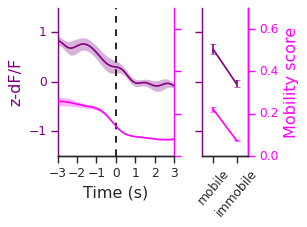

In [62]:
tst.plotMeans('LHA-DRN','immobility','onset',measure='movement',
              plot_type='mean and SEM',
              color='purple',periods=['mobile','immobile'],
              ylim=[-1.5,1.5],yticks=[-1,0,1],xlim=[-3,3],
              ylim1=[0,0.7],yticks1=[0,0.2,0.4,0.6],
              figsize=(4,3),save=True,imgname='plots/LH-DRN_TSToffset.pdf')
plt.show()

# Total correlation of calcium signal between LH outputs

In [ ]:
apt = FiberPhotometryTest('LH_apt-sct.h5','APT')
apt.getOutputCorrelation('LHA-DRN','LHA-VTA')
apt.getOutputCorrelation('LHA-DRN','LHA-LHb')
apt.getOutputCorrelation('LHA-VTA','LHA-LHb')

In [ ]:
sct = FiberPhotometryTest('LH_apt-sct.h5','SCT')
sct.getOutputCorrelation('LHA-DRN','LHA-VTA')
sct.getOutputCorrelation('LHA-DRN','LHA-LHb')
sct.getOutputCorrelation('LHA-VTA','LHA-LHb')

In [ ]:
oft = FiberPhotometryTest(filename,'OFT')
oft.getOutputCorrelation('LHA-DRN','LHA-VTA')
oft.getOutputCorrelation('LHA-DRN','LHA-LHb')
oft.getOutputCorrelation('LHA-VTA','LHA-LHb')

In [ ]:
tst = FiberPhotometryTest(filename,'TST')
tst.getOutputCorrelation('LHA-DRN','LHA-VTA')
tst.getOutputCorrelation('LHA-DRN','LHA-LHb')
tst.getOutputCorrelation('LHA-VTA','LHA-LHb')

In [ ]:
exp = FiberPhotometryExperiment(filename)

Tests information is successfully loaded.


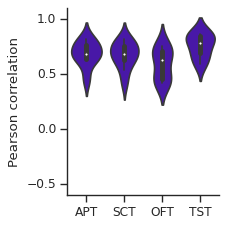

In [ ]:
exp.plotRoverTests('LHA-DRN',output1='LHA-VTA',tests=['APT','SCT','OFT','TST'],
                 ylabel='Pearson correlation',ylim=[-0.6,1.1],yticks=[-0.5,0,0.5,1],color=(0.25,0,0.75))
plt.show()

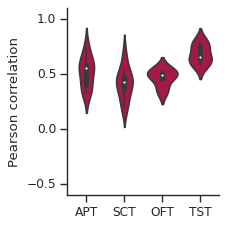

In [ ]:
exp.plotRoverTests('LHA-DRN',output1='LHA-LHb',tests=['APT','SCT','OFT','TST'],
                 ylabel='Pearson correlation',ylim=[-0.6,1.1],yticks=[-0.5,0,0.5,1],color=(0.75,0,0.25))
plt.show()

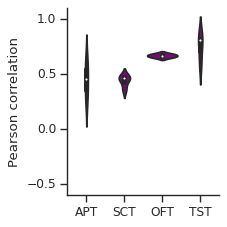

In [ ]:
exp.plotRoverTests('LHA-VTA',output1='LHA-LHb',tests=['APT','SCT','OFT','TST'],
                 ylabel='Pearson correlation',ylim=[-0.6,1.1],yticks=[-0.5,0,0.5,1],color=(0.5,0,0.5))
plt.show()

# Total correlation between mobility score and calcium signal

OFT-TST

In [64]:
oft = FiberPhotometryTest(filename,'OFT')

Experiment information for test OFT is successfully loaded.


In [65]:
oft.getMeasureCorrelation('movement')

LHA1,1 LHA1,2 LHA10,1 LHA14,1 LHA15,1 LHA16,1 LHA17,1 LHA3,2 LHA4,1 LHA6,1 LHA8,1 LHA9,1 .
Saved pearson correlation R and p values for output LHA-DRN and measurement movement.
LHA1,2 LHA15,1 LHA16,1 LHA6,2 LHA8,1 .
Saved pearson correlation R and p values for output LHA-LHb and measurement movement.
LHA1,1 LHA14,1 LHA15,1 LHA16,1 LHA17,1 LHA6,1 LHA9,1 .
Saved pearson correlation R and p values for output LHA-VTA and measurement movement.


In [66]:
tst = FiberPhotometryTest(filename,'TST')

Experiment information for test TST is successfully loaded.


In [67]:
tst.getMeasureCorrelation('movement')

LHA1,1 LHA14,1 LHA15,1 LHA16,1 LHA3,2 LHA6,1 LHA8,1 LHA9,1 .
Saved pearson correlation R and p values for output LHA-DRN and measurement movement.
LHA1,2 LHA14,1 LHA15,1 LHA16,1 LHA3,2 LHA8,1 .
Saved pearson correlation R and p values for output LHA-LHb and measurement movement.
LHA1,1 LHA14,1 LHA15,1 LHA16,1 LHA6,1 LHA9,1 .
Saved pearson correlation R and p values for output LHA-VTA and measurement movement.


In [68]:
exp = FiberPhotometryExperiment(filename)

Tests information is successfully loaded.


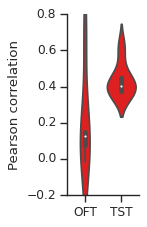

In [69]:
exp.plotRoverTests('LHA-LHb',measure='movement',tests=['OFT','TST'],
                 color='red',ylabel='Pearson correlation',ylim=[-0.2,0.8],figsize=(2,3))
plt.show()

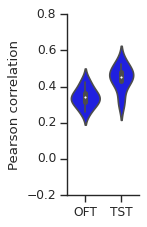

In [70]:
exp.plotRoverTests('LHA-VTA',measure='movement',tests=['OFT','TST'],
                 color='blue',ylabel='Pearson correlation',ylim=[-0.2,0.8],figsize=(2,3))
plt.show()

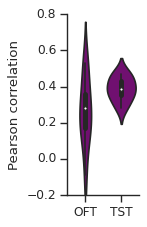

In [71]:
exp.plotRoverTests('LHA-DRN',measure='movement',tests=['OFT','TST'],
                 color='purple',ylabel='Pearson correlation',ylim=[-0.2,0.8],figsize=(2,3))
plt.show()

# Perievent correlation between mobility score and calcium signal

#### OFT

In [72]:
oft = FiberPhotometryTest(filename,'OFT')

Experiment information for test OFT is successfully loaded.


In [73]:
oft.getMeasurePerieventCorrelation('immobility','movement',win=3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


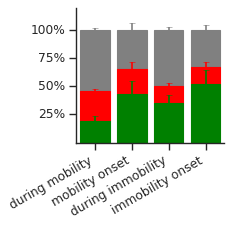

In [74]:
oft.plotMeasureCorrelationCounts('movement','LHA-LHb','immobility',
                                   event_labels = ['during mobility','mobility onset','during immobility','immobility onset'])
plt.show()

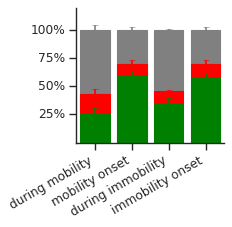

In [75]:
oft.plotMeasureCorrelationCounts('movement','LHA-VTA','immobility',
                                   event_labels = ['during mobility','mobility onset','during immobility','immobility onset'])
plt.show()

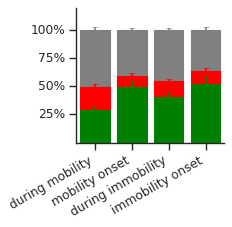

In [76]:
oft.plotMeasureCorrelationCounts('movement','LHA-DRN','immobility',
                                   event_labels = ['during mobility','mobility onset','during immobility','immobility onset'])
plt.show()

#### TST

In [77]:
tst = FiberPhotometryTest(filename,'TST')

Experiment information for test TST is successfully loaded.


In [ ]:
tst.getMeasurePerieventCorrelation('immobility','movement',win=3)

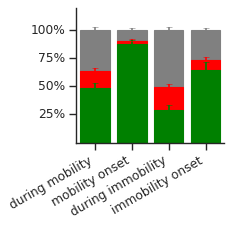

In [79]:
tst.plotMeasureCorrelationCounts('movement','LHA-LHb','immobility',
                                 event_labels = ['during mobility','mobility onset','during immobility','immobility onset'])
plt.show()

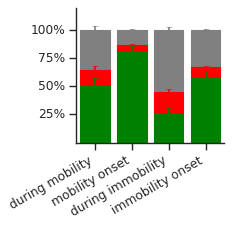

In [80]:
tst.plotMeasureCorrelationCounts('movement','LHA-VTA','immobility',
                                  event_labels = ['during mobility','mobility onset','during immobility','immobility onset'])
plt.show()

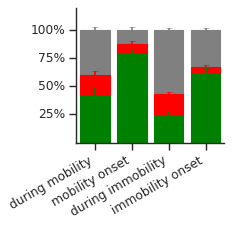

In [81]:
tst.plotMeasureCorrelationCounts('movement','LHA-DRN','immobility',
                                  event_labels = ['during mobility','mobility onset','during immobility','immobility onset'])
plt.show()

# Cross-correltion between mobility score and calcium signal

#### OFT

In [82]:
oft = FiberPhotometryTest(filename,'OFT')

Experiment information for test OFT is successfully loaded.


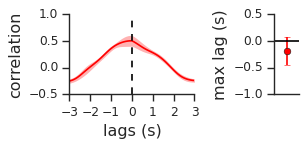

In [83]:
oft.plotMeasureCrossCorrelation('movement','LHA-LHb','immobility','offset',
                                color='red',ylim=[-0.5,1],yticks=[-0.5,0,0.5,1],yticks1=[-1,-0.5,0,0.5],
                                save=True,imgname='plots/crosscorr_OFT_LHb.pdf')
plt.show()

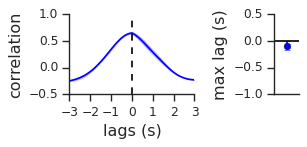

In [84]:
oft.plotMeasureCrossCorrelation('movement','LHA-VTA','immobility','offset',
                                color='blue',ylim=[-0.5,1],yticks=[-0.5,0,0.5,1],yticks1=[-1,-0.5,0,0.5],
                                save=True,imgname='plots/crosscorr_OFT_VTA.pdf')
plt.show()

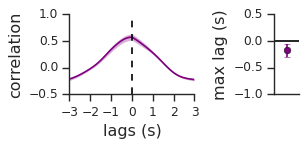

In [85]:
oft.plotMeasureCrossCorrelation('movement','LHA-DRN','immobility','offset',
                                color='purple',ylim=[-0.5,1],yticks=[-0.5,0,0.5,1],yticks1=[-1,-0.5,0,0.5],
                                save=True,imgname='plots/crosscorr_OFT_DRN.pdf')
plt.show()

#### TST

In [86]:
tst = FiberPhotometryTest(filename,'TST')

Experiment information for test TST is successfully loaded.


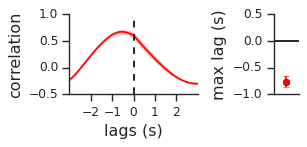

In [87]:
tst.plotMeasureCrossCorrelation('movement','LHA-LHb','immobility','offset',
                                color='red',ylim=[-0.5,1],yticks=[-0.5,0,0.5,1],xticks=[-2,-1,0,1,2],yticks1=[-1,-0.5,0,0.5],
                                save=True,imgname='plots/crosscorr_TST_LHb.pdf')
plt.show()

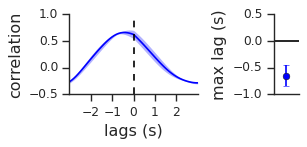

In [88]:
tst.plotMeasureCrossCorrelation('movement','LHA-VTA','immobility','offset',
                                color='blue',ylim=[-0.5,1],yticks=[-0.5,0,0.5,1],xticks=[-2,-1,0,1,2],yticks1=[-1,-0.5,0,0.5],
                                save=True,imgname='plots/crosscorr_TST_VTA.pdf')
plt.show()

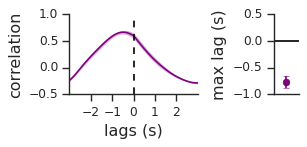

In [89]:
tst.plotMeasureCrossCorrelation('movement','LHA-DRN','immobility','offset',
                                color='purple',ylim=[-0.5,1],yticks=[-0.5,0,0.5,1],xticks=[-2,-1,0,1,2],yticks1=[-1,-0.5,0,0.5],
                                save=True,imgname='plots/crosscorr_TST_DRN.pdf')
plt.show()

# Save summary data to excel file for statistical analysis

In [ ]:
apt = FiberPhotometryTest(filename,'APT')
sct = FiberPhotometryTest(filename,'SCT')
oft = FiberPhotometryTest(filename,'OFT')
tst = FiberPhotometryTest(filename,'TST')

Experiment information for test APT is successfully loaded.
Experiment information for test SCT is successfully loaded.
Experiment information for test OFT is successfully loaded.
Experiment information for test TST is successfully loaded.


In [ ]:
df_apt = apt.getDataFrameAUC('airpuff','onset',['baseline','airpuff'])
df_sct = sct.getDataFrameAUC('consumption','onset',['baseline','onset','drinking'])
df_oft = oft.getDataFrameAUC('immobility','offset',['immobile','preonset','onset','mobile'])
df_tst = tst.getDataFrameAUC('immobility','offset',['immobile','preonset','onset','mobile'])
df_oft_mob = oft.getDataFrameAUCmeasure('immobility','offset',['immobile','preonset','onset','mobile'])
df_tst_mob = tst.getDataFrameAUCmeasure('immobility','offset',['immobile','preonset','onset','mobile'])

In [ ]:
exp = FiberPhotometryExperiment(filename)

Tests information is successfully loaded.


In [ ]:
df_corr = exp.getDataFrameRoutputs(tests=['APT','SCT','OFT','TST'])

In [ ]:
!pip install xlsxwriter
import xlsxwriter

In [ ]:
writer = pd.ExcelWriter('../sourcedata/fig1_LH_apt-sct-oft-tst.xlsx', engine='xlsxwriter')
df_apt.to_excel(writer,sheet_name='APT', index=False)
df_sct.to_excel(writer,sheet_name='SCT', index=False)
df_oft.to_excel(writer,sheet_name='OFT', index=False)
df_tst.to_excel(writer,sheet_name="TST", index=False)
df_oft_mob.to_excel(writer,sheet_name='OFT_mobileScore', index=False)
df_tst_mob.to_excel(writer,sheet_name="TST_mobileScore", index=False)
df_corr.to_excel(writer,sheet_name='outputCorrelation', index=False)
writer.save()

In [ ]:
df_total = exp.getDataFrameRmeasure('movement',['OFT','TST'])
df_peri = exp.getDataFrameMeasureCorrCounts('movement',['OFT','TST'],['LHA-DRN','LHA-VTA','LHA-LHb'])
df_oft = oft.getDataFrameCrossCorr('movement','immobility','offset')
df_tst = tst.getDataFrameCrossCorr('movement','immobility','offset')
df_oft['test'] = 'OFT'
df_tst['test'] = 'TST'
df_crossCorr = pd.concat([df_tst,df_oft])

In [ ]:
writer = pd.ExcelWriter('../sourcedata/fig2_LH_movementCorrelation.xlsx', engine='xlsxwriter')
df_total.to_excel(writer,sheet_name='total',index=False)
df_peri.to_excel(writer,sheet_name='perievent',index=False)
df_crossCorr.to_excel(writer,sheet_name='crossCorrelation',index=False)
writer.save()